In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv('../data/traffic.csv') #读取csv数据
df.head()  #展示前五行数据

,red,area,width,density,land,cbd,traffic
0,1,450,18,0,0,3,2
1,1,260,14,0,0,3,2
2,1,295,18,0,0,3,1
3,2,286,16,1,0,0,2
4,0,520,14,0,0,3,2


In [4]:
len(df['traffic'])

281

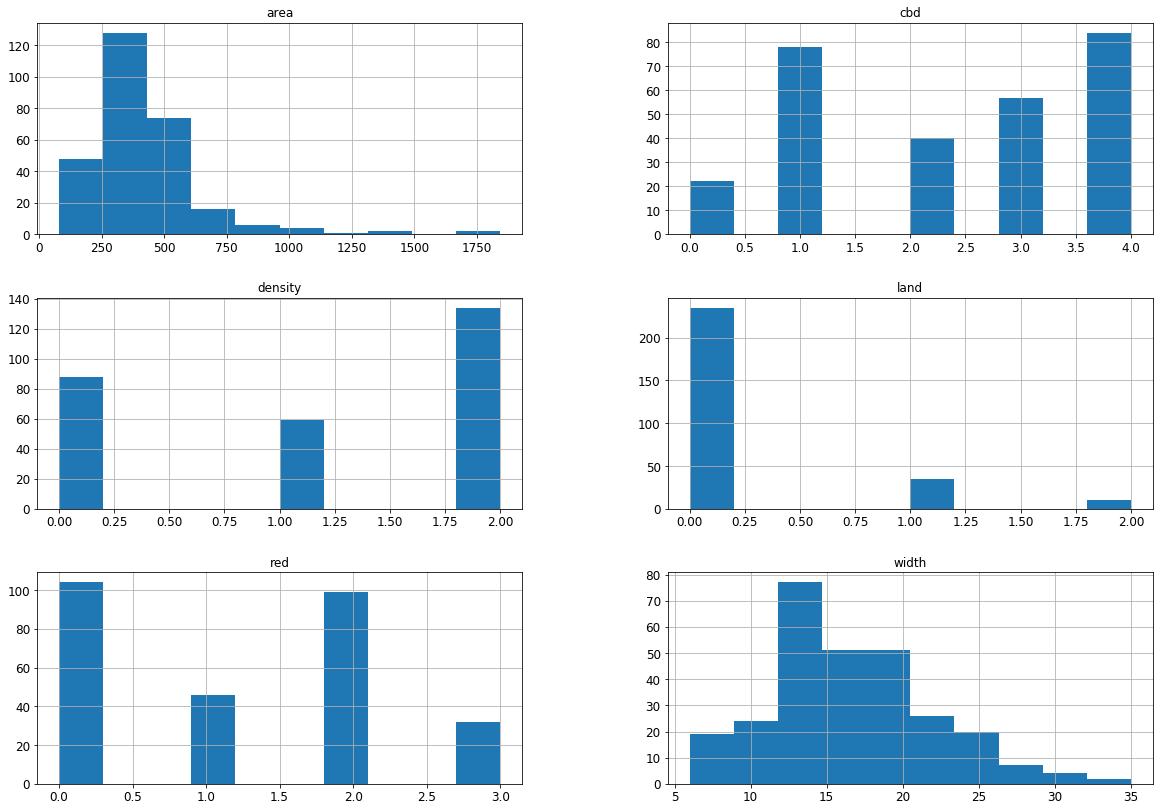

In [5]:
X = df.iloc[:,0:6]  #取df的前5列为X变量
y = df['traffic'] #设置y变量

X.hist(xlabelsize=12,ylabelsize=12,figsize=(20,14))  #调整直方图尺寸
plt.show()

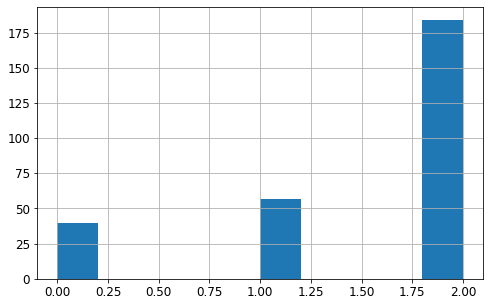

In [6]:
y.hist(xlabelsize=12,ylabelsize=12,figsize=(8,5))  #调整直方图尺寸
plt.show()

In [7]:
# 把X、y转化为数组形式，以便于计算
X = np.array(X.values)  
y = np.array(y.values)

In [8]:
#以25%的数据构建测试样本，剩余作为训练样本
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state =2)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((210, 6), (71, 6), (210,), (71,))

In [10]:
tree_ID3 = DecisionTreeClassifier(criterion='entropy') 
#默认采用的是gini，即是cart算法，在这里通过entropy设置ID3算法
tree_ID3 = tree_ID3.fit(X_train, y_train)  #采用ID3算法进行训练
y_pred_ID3 =tree_ID3.predict(X_test) #对测试集进行预测
accuracy_score(y_test, y_pred_ID3)  #计算准确率
confusion_matrix(y_true=y_test, y_pred=y_pred_ID3)  #计算混淆矩阵

array([[ 5,  5,  2],
       [ 3,  7,  0],
       [ 2,  3, 44]], dtype=int64)

In [12]:
#定义一个随机森林分类器 用oob_score=True的话会起冲突
clf = RandomForestClassifier(n_estimators=10,max_depth=None, min_samples_split=2, random_state=0)
clf.fit(X_train, y_train) #进行训练

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [14]:
# print(clf.oob_score_) #袋外数据的预测精度
#可见此时我们的袋外分数有一定的提高。也就是时候模型的泛化能力增强了。

In [15]:
y_pred_rf =clf.predict(X_test)  #预测测试集

y_pred_rf

array([0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 1, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2], dtype=int64)

In [16]:
accuracy_score(y_test, y_pred_rf)  #计算准确率

0.8169014084507042

In [17]:
confusion_matrix(y_true=y_test, y_pred=y_pred_rf)  #计算混淆矩阵

array([[ 3,  5,  4],
       [ 3,  7,  0],
       [ 0,  1, 48]], dtype=int64)

In [18]:
#定义一个极端森林分类器
clf_extra = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
clf_extra.fit(X_train, y_train)  #进行训练

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [19]:
y_pred_extra =clf_extra.predict(X_test)  #预测测试集

y_pred_extra

array([0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 1, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 0, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2], dtype=int64)

In [20]:
accuracy_score(y_test, y_pred_extra)  #计算准确率

0.8450704225352113

In [21]:
confusion_matrix(y_true=y_test, y_pred=y_pred_extra)  #计算混淆矩阵

array([[ 6,  4,  2],
       [ 2,  7,  1],
       [ 1,  1, 47]], dtype=int64)